In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import trapezoid as tp
from matplotlib import pylab as plt

In [2]:
df= pd.read_csv("2024-1-312712-311348c-Ghd7fl-MBP.dx_DAD1E.CSV")

In [3]:
df.columns

Index(['0.00458333333333333', '0.0119209289550781'], dtype='object')

In [4]:
###get UV columns and Wavelengths
uv_columns = df[columns].values
#wavelengths = df[]
time = df

NameError: name 'columns' is not defined

In [3]:


df = pd.read_csv('2024-1-312712-311348c-Ghd7fl-MBP.dx_DAD1E.CSV', header=None, names=['Time', 'UV_wavelength'])

# Extract time and data columns
time_column = df['Time'] 
UV_280 = df['UV_wavelength']  
print("Time column:")
print(time_column)

print("\nUV_wavelength:")
print(UV_280)


Time column:
0        0.004583
1        0.011250
2        0.017917
3        0.024583
4        0.031250
          ...    
3745    24.971250
3746    24.977917
3747    24.984583
3748    24.991250
3749    24.997917
Name: Time, Length: 3750, dtype: float64

UV_wavelength:
0       0.011921
1       0.014782
2       0.020504
3       0.028610
4       0.038147
          ...   
3745    4.396439
3746    4.392624
3747    4.390717
3748    4.389763
3749    4.389763
Name: UV_wavelength, Length: 3750, dtype: float64


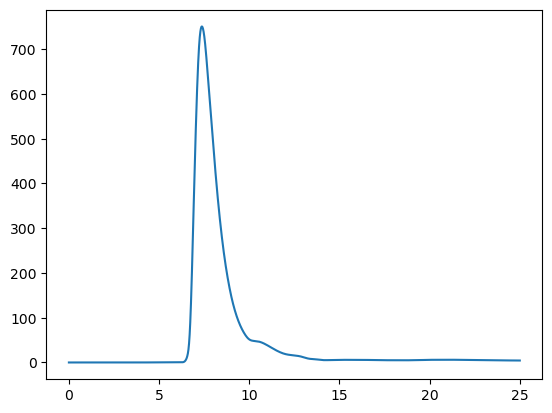

In [4]:
plt.plot(time_column, UV_280)

In [37]:
hlf_max= UV_280.max()/2

In [38]:
hlf_max

375.391483306885

In [8]:
fwhm

375.391483306885

In [39]:
peak_max_index=UV_280.idxmax()

In [40]:
peak_max_index

1106

In [41]:
peak_max_index_time=time_column.idxmax()

In [42]:
peak_max_index_time

3749

In [13]:
df["UV_wavelength"]

750.78296661377

In [49]:
left_half_max_index = (df[df['UV_wavelength'] >= hlf_max]['Time']).idxmin()
right_half_max_index = (df[df['UV_wavelength'] >= hlf_max]['Time']).idxmax()

In [44]:
left_half_max_index

1041

In [45]:
right_half_max_index

1235

In [22]:
###width
peak_width = df.loc[right_half_max_index, "Time"] - df.loc[left_half_max_index, "Time"]
print(peak_width)

1.29333333333334


In [52]:
UV_values=df["UV_wavelength"].values
time_values=df["Time"].values

In [26]:
(peak_width/2.5)*60

31.040000000000166

In [57]:
area_under_peak = tp(df["UV_wavelength"][left_half_max_index:right_half_max_index + 1], x=df["Time"][left_half_max_index:right_half_max_index + 1])

In [61]:
print(area_under_peak/1000)

0.7737441333134996


In [62]:

molar_absorp = 38000# Example molar absorptivity coefficient in L mol^-1 cm^-1
path_length = 1  # Example path length in cm
absorbance = .773  # Example absorbance


concentration_molar = absorbance / (molar_absorp * path_length)

# Convert concentration to mg/mL (assuming molecular weight of solute is known)
molecular_weight = 15000  #g/mol
concentration_mg_ml = concentration_molar * molecular_weight


print("Concentration (mg/mL):", concentration_mg_ml)


Concentration (mg/mL): 0.3051315789473685


In [83]:
def concentration_UV_280(molar_absorp,  absorbance, molecular_weight, path_length=1):
    concentration_molar = absorbance / (molar_absorp * path_length)
    concentration_mg_ml = concentration_molar * molecular_weight
    return concentration_mg_ml
    print(f'Concentration in mg_ml is : {concentration_mg_ml}')
    
    
    

In [84]:
def integrate_UV_280(spreadsheet):
    df= pd.read_csv(spreadsheet, header=None, names=['Time', 'UV_wavelength'])
    time_column = df['Time'] 
    UV_280 = df['UV_wavelength'] 
    plt.plot(time_column, UV_280)
    hlf_max= UV_280.max()/2
    left_half_max_index = (df[df['UV_wavelength'] >= hlf_max]['Time']).idxmin()
    right_half_max_index = (df[df['UV_wavelength'] >= hlf_max]['Time']).idxmax()
    peak_width = df.loc[right_half_max_index, "Time"] - df.loc[left_half_max_index, "Time"]
    UV_values=df["UV_wavelength"].values
    time_values=df["Time"].values
    area_under_peak = (tp(df["UV_wavelength"][left_half_max_index:right_half_max_index + 1], x=df["Time"][left_half_max_index:right_half_max_index + 1]))/1000 ##data in maU
    print(f" peak width: {peak_width} area_under_peak: {area_under_peak}")
    return peak_width, area_under_peak
    

    
    
    

In [85]:
def protein_concentration_from_agilent(spreadsheet, molar_absorp,molecular_weight):
    peak_width, area_under_peak = integrate_UV_280(spreadsheet=spreadsheet)
    conc = concentration_UV_280(molar_absorp=molar_absorp, absorbance=area_under_peak, molecular_weight=molecular_weight)
    print(f" The concentration based on UV is {conc} mg/mL")
    return conc
    

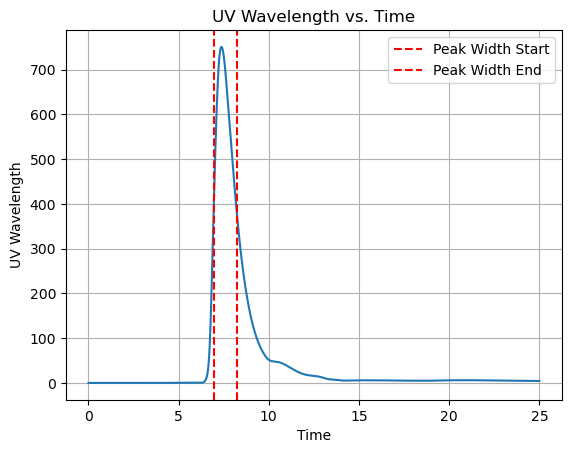

Peak width: 1.29333333333334, Area under peak: 0.7737441333134996
 The concentration based on UV is 0.30542531578164456 mg/mL


0.30542531578164456

In [96]:
protein_concentration_from_agilent("2024-1-312712-311348c-Ghd7fl-MBP.dx_DAD1E.CSV", 38000, 15000)

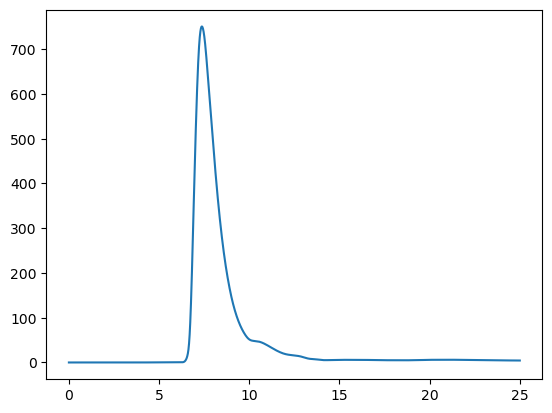

In [88]:
plt.figure()
plt.plot(time_column, UV_280)
#plt.axvspan(df["UV_wavelength"].valuesleft_half_max_index, right_half_max_index, color='gray', alpha=0.3, label='Peak Width')

In [ ]:
injection_volume = 50


In [98]:


def integrate_UV_280(spreadsheet):
    # Read data
    df = pd.read_csv(spreadsheet, header=None, names=['Time', 'UV_wavelength'])
    time_column = df['Time'] 
    UV_280 = df['UV_wavelength'] 
    
    # Plot data
    plt.plot(time_column, UV_280)
    
    # Calculate half-maximum value
    hlf_max = UV_280.max() / 2
    
    # Find indices corresponding to half-maximum
    left_half_max_index = UV_280.index[UV_280 >= hlf_max][0]
    right_half_max_index = UV_280.index[UV_280 >= hlf_max][-1]
    
    # Calculate peak width
    peak_width = time_column[right_half_max_index] - time_column[left_half_max_index]
    
    # Perform integration using trapz
    area_under_peak = tp(UV_280[left_half_max_index:right_half_max_index + 1], 
                            x=time_column[left_half_max_index:right_half_max_index + 1]) / 1000
    
    # Plot peak width
    plt.axvline(x=time_column[left_half_max_index], color='r', linestyle='--', label='Peak Width Start')
    plt.axvline(x=time_column[right_half_max_index], color='r', linestyle='--', label='Peak Width End')
    
    plt.xlabel('Time')
    plt.ylabel('UV 280')
    plt.title('UV 280 vs. Time')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"Peak width: {peak_width}, Area under peak: {area_under_peak}")
    
    return peak_width, area_under_peak





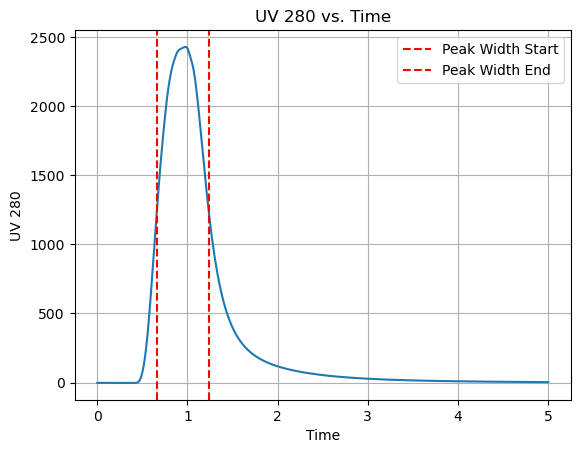

Peak width: 0.5733333333333329, Area under peak: 1.1741704289118442


(0.5733333333333329, 1.1741704289118442)

In [100]:
integrate_UV_280("2022-3-311944-310422-Lyz_nc_60_035.dx_DAD1E.csv")

In [101]:
0.57*0.35

0.19949999999999998

In [102]:
50/200

0.25

In [103]:
200/50

4.0

In [13]:
def find_peaks(UV_data, window_size, threshold):
    peaks = []
    for i in range(len(UV_data) - window_size + 1):
        window = UV_data[i:i+window_size]
        max_value = window.max()  # Use max() method to find the maximum value
        if max_value >= threshold:
            # If the maximum value in the window is above the threshold, 
            # consider it as a peak and record its index
            peak_index = i + window.argmax()  # Use argmax() method to find the index of the maximum value
            peaks.append(peak_index)
    return peaks


In [18]:
peaks=find_peaks(UV_280, window_size=10, threshold=250)

In [20]:
max(peaks)

1285

In [23]:
peaks.[1285]

SyntaxError: invalid syntax (2436703821.py, line 1)